In [47]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

In [2]:
train_csv_path = "C:/Users/mdr/Desktop/train.csv"
image_folder = "C:/Users/mdr/Desktop/images"

train_df = pd.read_csv(train_csv_path)

In [3]:
train_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [4]:
def combine_columns(row):
    if row["healthy"] == 1:
        return "healthy"
    elif row["multiple_diseases"] == 1:
        return "multiple_diseases"
    elif row["rust"] == 1:
        return "rust"
    elif row["scab"] == 1:
        return "scab"
    return "unknown"


train_df["label"] = train_df.apply(combine_columns, axis=1)
train_df = train_df.drop(["healthy", "multiple_diseases", "rust", "scab"], axis=1)

In [5]:
train_df

,image_id,label
0,Train_0,scab
1,Train_1,multiple_diseases
2,Train_2,healthy
3,Train_3,rust
4,Train_4,healthy
...,...,...
1816,Train_1816,scab
1817,Train_1817,healthy
1818,Train_1818,healthy
1819,Train_1819,rust


# feature extraction from images

In [7]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [8]:
def extract_features(image_path, model):
    img = load_img(image_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()


In [9]:
features_list = []
labels = []

for index, row in train_df.iterrows():
    image_path = os.path.join(image_folder, f"{row['image_id']}.jpg")
    if os.path.exists(image_path):
        try:
            features = extract_features(image_path, vgg_model)
            features_list.append(features)
            labels.append(row['label'])
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    else:
        print(f"Image not found: {image_path}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

# change it to data frame

In [11]:
features_df = pd.DataFrame(features_list)
features_df['label'] = labels



In [12]:
features_df 

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,label
0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,13.646269,0.0,0.0,0.0,0.000000,0.00000,scab
1,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,multiple_diseases
2,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,21.315714,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3.947766,0.00000,healthy
3,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,rust
4,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,scab
1817,0.00000,0.0,0.000000,0.000000,0.000000,10.216112,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,healthy
1818,0.00000,0.0,0.000000,0.000000,1.446373,0.000000,0.0,0.000000,0.0,0.0,...,0.0,3.239152,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,healthy
1819,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6.306274,0.00000,rust


# label encoding Target

In [14]:
features_df["label"] = features_df["label"].map({"healthy": 0, "rust": 1, "scab": 2, "multiple_diseases": 3})
features_df["label"] = features_df["label"].astype(int)

In [15]:
features_df["label"].value_counts()

label
1    622
2    592
0    516
3     91
Name: count, dtype: int64

# smote amd standardlization for data

In [17]:
X_original = features_df.drop("label", axis=1)
Y_original = features_df["label"]


print("Class distribution before SMOTE:")
print(Y_original.value_counts())

smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_original, Y_original)

print("\nClass distribution after SMOTE:")
print(pd.Series(Y_resampled).value_counts())

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

X = pd.DataFrame(X_resampled_scaled, columns=X_original.columns)
Y = pd.Series(Y_resampled, name="label")

balanced_features_df = pd.concat([X, Y], axis=1)



print("\nSuccess")


Class distribution before SMOTE:
label
1    622
2    592
0    516
3     91
Name: count, dtype: int64

Class distribution after SMOTE:
label
2    622
3    622
0    622
1    622
Name: count, dtype: int64

Success


In [18]:
balanced_features_df

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,label
0,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.353444,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,2.383152,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,2
1,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.353444,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,3
2,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,3.383496,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,0.593403,-0.193237,0
3,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.353444,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,1
4,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.353444,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483,-0.222476,-0.121596,-0.11679,-0.118912,-0.168421,-0.189538,-0.139583,0.025828,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,3
2484,-0.157296,-0.121596,-0.11679,-0.197089,-0.168421,1.735592,-0.139583,0.221378,-0.055775,-0.164085,...,-0.084649,0.688757,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,3
2485,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.338345,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.188442,-0.196597,-0.094130,-0.070986,-0.12571,-0.351413,-0.193237,3
2486,-0.222476,-0.121596,-0.11679,-0.197089,-0.168421,-0.189538,-0.139583,-0.353444,-0.055775,-0.164085,...,-0.084649,-0.228772,-0.249366,-0.196597,-0.094130,-0.070986,-0.12571,-0.447966,-0.193237,3


# Splitting the data 

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

label
1    507
2    507
3    492
0    484
Name: count, dtype: int64

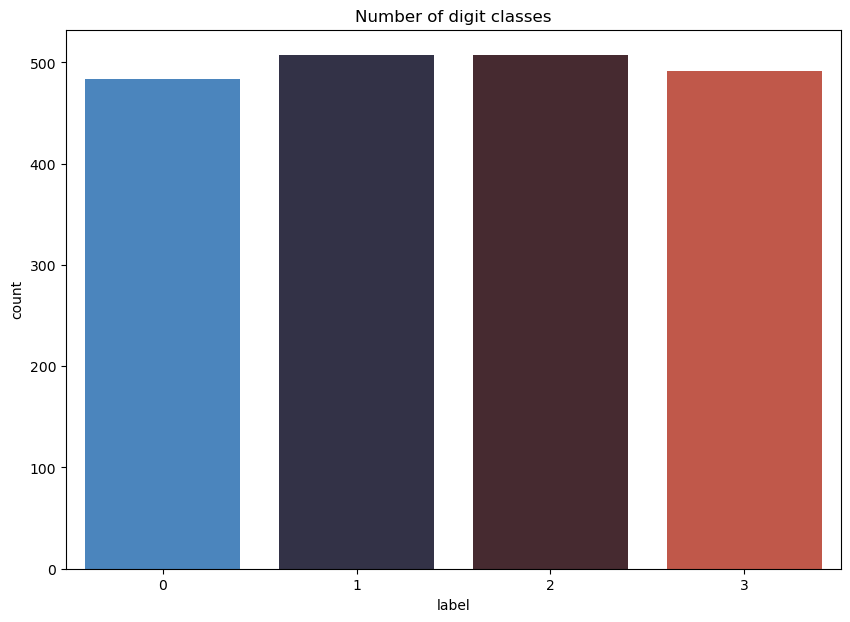

In [57]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,7))
sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()


# logistic Model

In [62]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(X_test)


print(classification_report(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



loss = logistic_model.predict_proba(X_test)
log_loss_value = log_loss(Y_test, loss)
print(f"Log-Loss: {log_loss_value:.4f}")
 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       138
           1       0.91      0.80      0.85       115
           2       0.93      0.88      0.90       115
           3       0.99      1.00      1.00       130

    accuracy                           0.91       498
   macro avg       0.91      0.90      0.91       498
weighted avg       0.91      0.91      0.91       498

Accuracy: 90.76%
Log-Loss: 0.3048


# confusion matrix


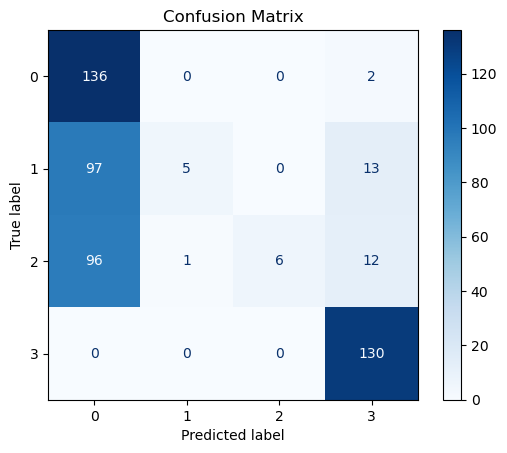

In [72]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# det 5 randoms to see them

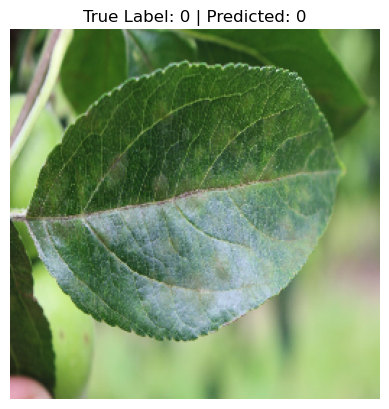

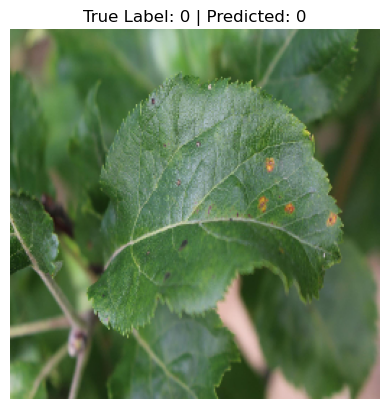

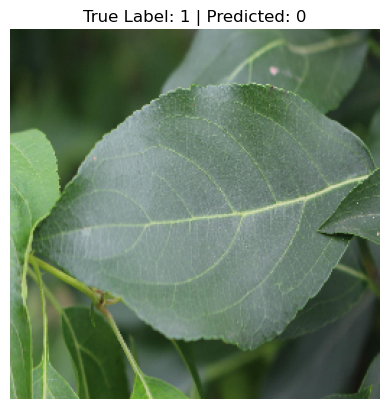

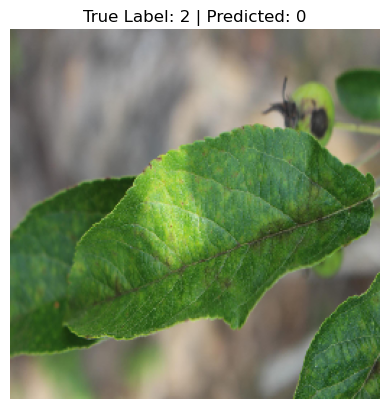

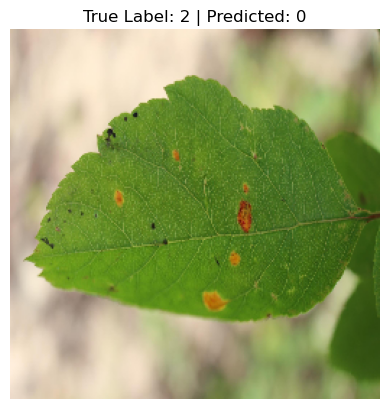

In [70]:
sample_indices = random.sample(range(len(Y_test)), 5)

for index in sample_indices:
    row = train_df.iloc[index]
    image_path = os.path.join(image_folder, f"{row['image_id']}.jpg")
    
    if os.path.exists(image_path):
        img = load_img(image_path, target_size=(256, 256))

        plt.imshow(img)
        plt.title(f"True Label: {Y_test.iloc[index]} | Predicted: {Y_pred[index]}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Image not found: {image_path}")


# graph ROC and calculate AUC

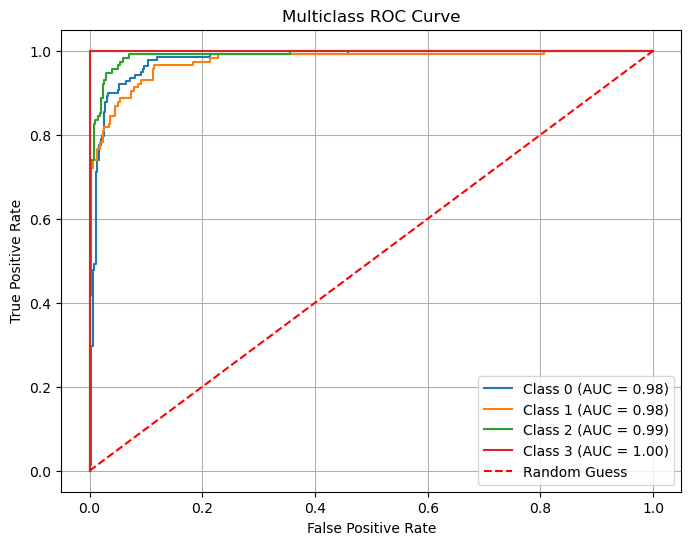

In [74]:
classes = logistic_model.classes_  
Y_test_binarized = label_binarize(Y_test, classes=classes)

Y_pred_proba = logistic_model.predict_proba(X_test)


plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], Y_pred_proba[:, i])
    auc_score = roc_auc_score(Y_test_binarized[:, i], Y_pred_proba[:, i])
    
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# the best KNeighbors

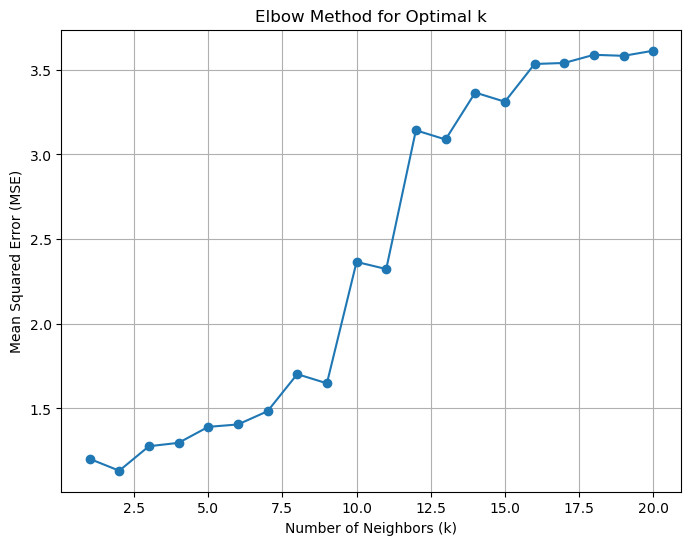

In [31]:
k_range = range(1, 21)
mse_values = []


for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error( Y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(8,6))
plt.plot(k_range, mse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# KNeighborsClassifier Model

In [68]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
print(classification_report(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")




loss = knn.predict_proba(X_test)
log_loss_value = log_loss(Y_test, loss)
print(f"Log-Loss: {log_loss_value:.4f}")
 

              precision    recall  f1-score   support

           0       0.41      0.99      0.58       138
           1       0.83      0.04      0.08       115
           2       1.00      0.05      0.10       115
           3       0.83      1.00      0.91       130

    accuracy                           0.56       498
   macro avg       0.77      0.52      0.42       498
weighted avg       0.75      0.56      0.44       498

Accuracy: 55.62%
Log-Loss: 13.9103


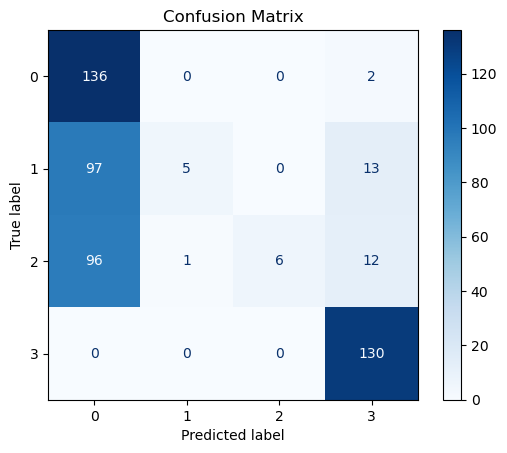

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


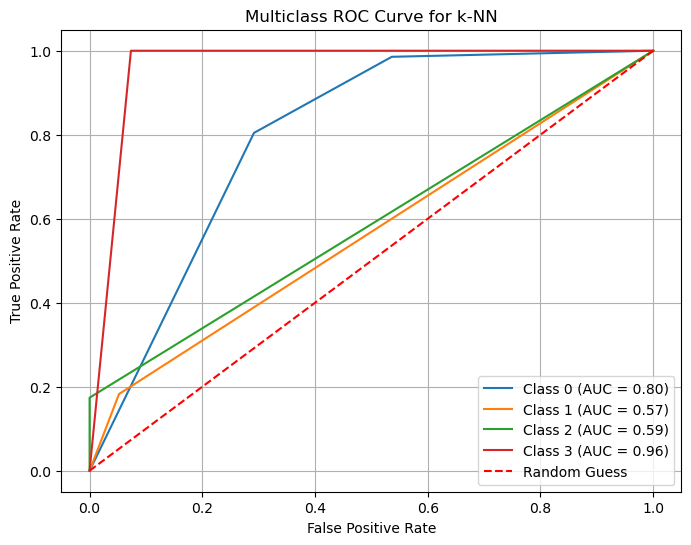

In [35]:
classes = knn.classes_
Y_test_binarized = label_binarize(Y_test, classes=classes)


Y_pred_proba = knn.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], Y_pred_proba[:, i])
    auc_score = roc_auc_score(Y_test_binarized[:, i], Y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")


plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve for k-NN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


